## 35. Time Series Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_37496/4261414820.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')


In [15]:
df.date.tolist()[::12][0][:4]

'1949'

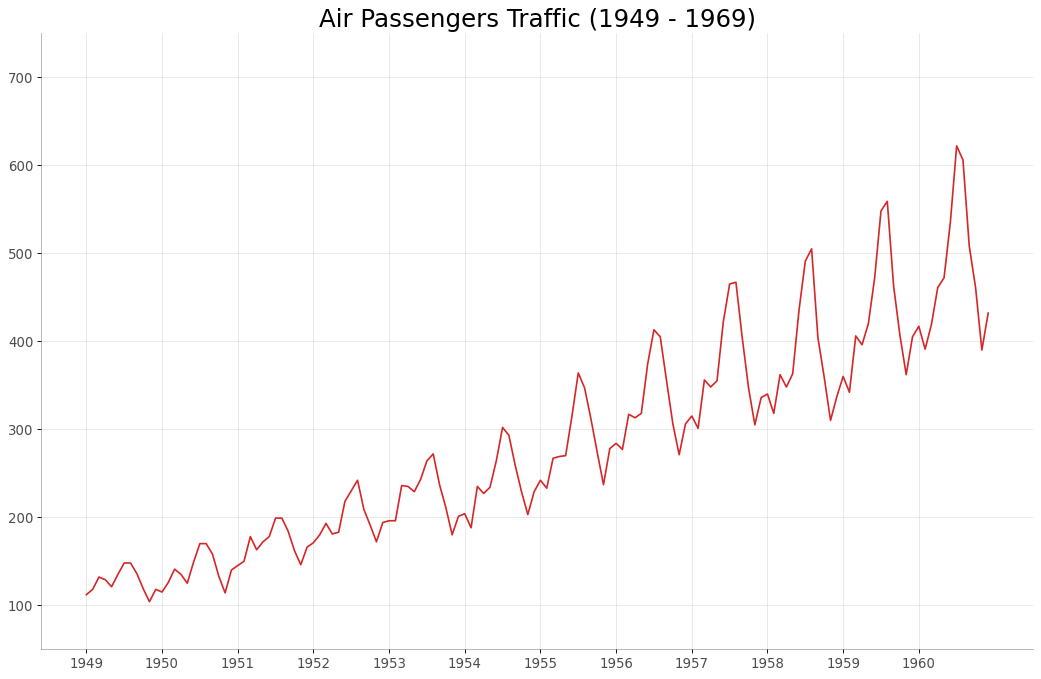

In [21]:
#draw plot
plt.figure(figsize=(16,10),dpi=80)
plt.plot('date','value',data=df,c='tab:red')
#Decoration
plt.ylim(50,750)
xtick_location=df.index.tolist()[::12]
xtick_labels=[x[:4] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

#Romove borders
plt.gca().spines['top'].set_alpha(0.0)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(0.3)
plt.show()

## 36. Time Series with peaks and through 

### 找peak和trough的方法：so smart!
np.sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. nan is returned for nan inputs.


In [2]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# Get the Peaks and Troughs
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peck_locations=np.where(doublediff==-2)[0]+1
trough_locations=np.where(doublediff==2)[0]+1


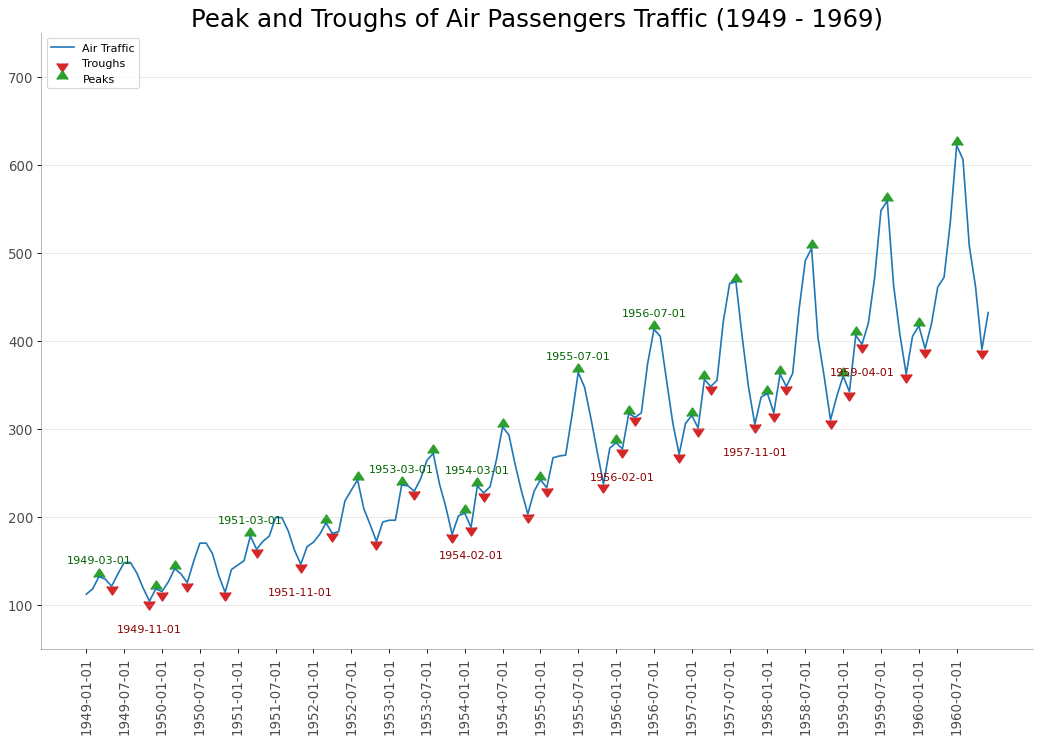

In [14]:
#Draw plots
plt.figure(figsize=(16,10),dpi=80)
plt.plot('date','value',data=df,color='tab:blue',label='Air Traffic')
plt.scatter(df.date[trough_locations],df.value[trough_locations],marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')
plt.scatter(df.date[peck_locations],df.value[peck_locations],marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')

#Annotate
for t, p in zip(trough_locations[1::5], peck_locations[::3]):
    plt.text(df.date[p], df.value[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t]-35, df.date[t], horizontalalignment='center', color='darkred')
# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()


## 37. Autocorrelation (ACF) and Partial Autocorrelation (PACF) plot


The ACF plot shows the correlation of the time series with its own lags.Each vertical line (on the autocorrelation plot) represents the correlation between the series and its lag starting from lag 0. The blue shaded region in the plot is the significance level. Those lags that lie above the blue line are the significant lags.

PACF on the other had shows the autocorrelation of any given lag (of time series) against the current series, but with the contributions of the lags-inbetween removed.



In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')


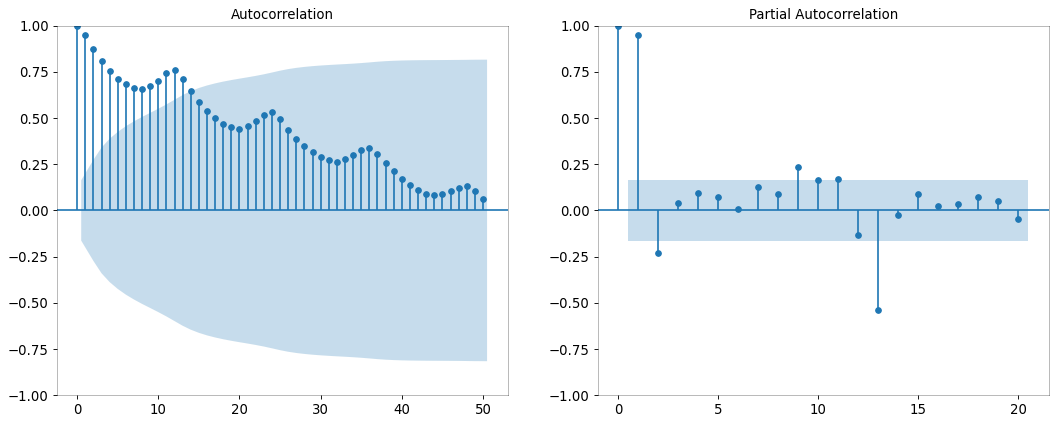

In [8]:
##Draw plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6), dpi= 80)
plot_acf(df.value.tolist(), ax=ax1, lags=50)
plot_pacf(df.value.tolist(), ax=ax2, lags=20)
# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

## 38. Cross Correlation plot

If the slope is positive, the cross correlation is positive; if there is a negative slope, the cross correlation is negative.

In [11]:
import statsmodels.tsa.stattools as stattools
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
x = df['mdeaths']
y = df['fdeaths']
# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)
# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

<>:10: DeprecationWarning: invalid escape sequence \;


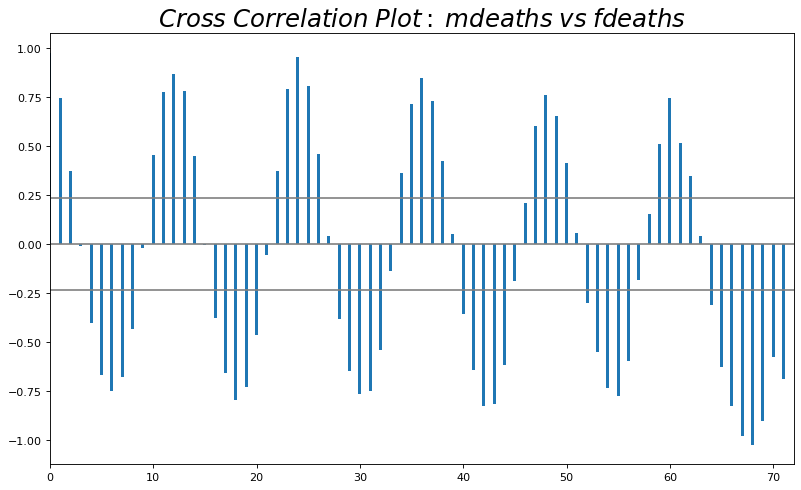

In [16]:
#plot
plt.figure(figsize=(12,7),dpi=80)
plt.hlines(0,xmin=0,xmax=100,color='gray')    #0 axies
plt.hlines(conf_level,xmin=0,xmax=100,color='gray')   
plt.hlines(-conf_level,xmin=0,xmax=100,color='gray') 

plt.bar(x=np.arange(len(ccs)),height=ccs,width=.3)

#Decoration
plt.title('$Cross\; Correlation\; Plot:\; mdeaths\; vs\; fdeaths$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

## 39. Time Series Decomposition plot


$$ need to figure out how to adjust the ylim of residual plot

Time series decomposition plot shows the break down of the time series into trend, seasonal and residual components.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [36]:
#data preparation
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)


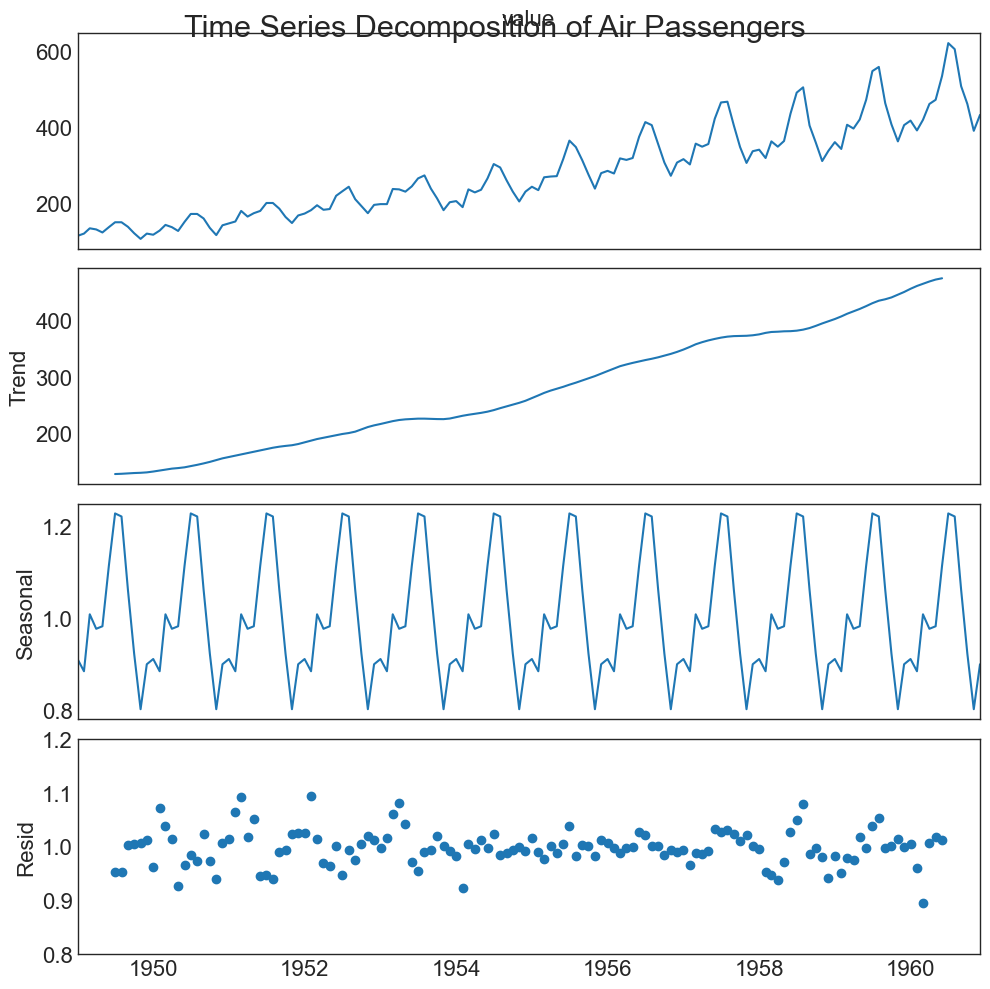

In [37]:
#Decompose
result=seasonal_decompose(df['value'],model='multiplicative')
#plot 
plt.rcParams.update({'figure.figsize':(10,10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.ylim(0.8,1.2)
plt.show()


## Multiple Time Series

In [29]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')


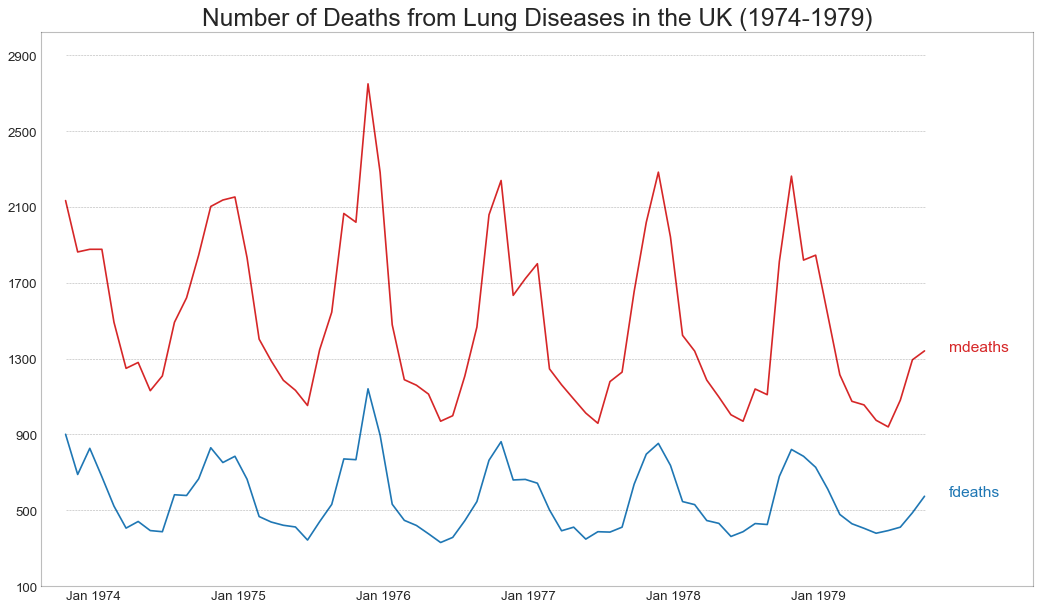

In [31]:
# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval=400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']  
#draw plot and annotate
fig,ax=plt.subplots(1,1,figsize=(16,9),dpi=80)
columns =df.columns[1:]
for i, column in enumerate(columns):
    plt.plot(df.date.values, df[column].values,lw=1.5,color=mycolors[i])
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

    
    
# Draw tick lines
for y in range(y_LL,y_UL,y_interval):
    plt.hlines(y,xmin=0,xmax=71,colors='black',alpha=0.3,linestyles="--", lw=0.5)
#Decorations
plt.tick_params(axis="both",which='both',bottom=False,top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

    

## 41. Plotting with different scales using secondary Y axis

In [38]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


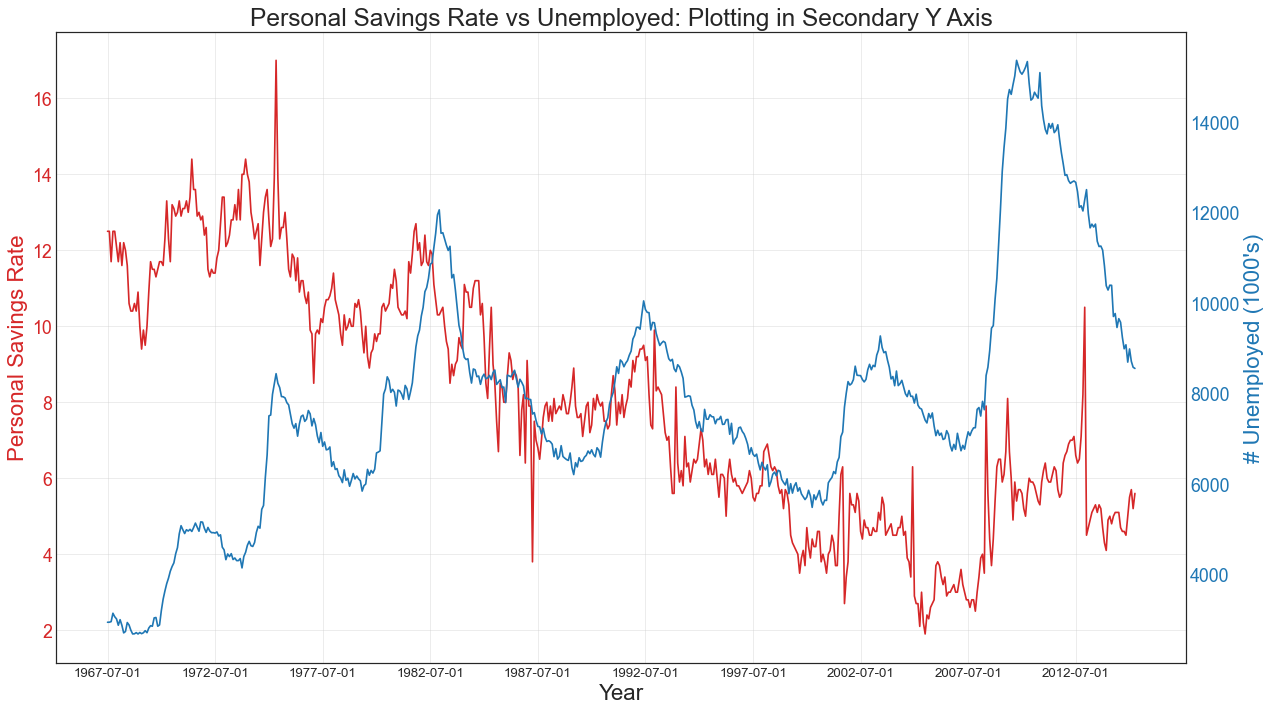

In [40]:
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')
# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()


## 42. Time Series with Error Bands

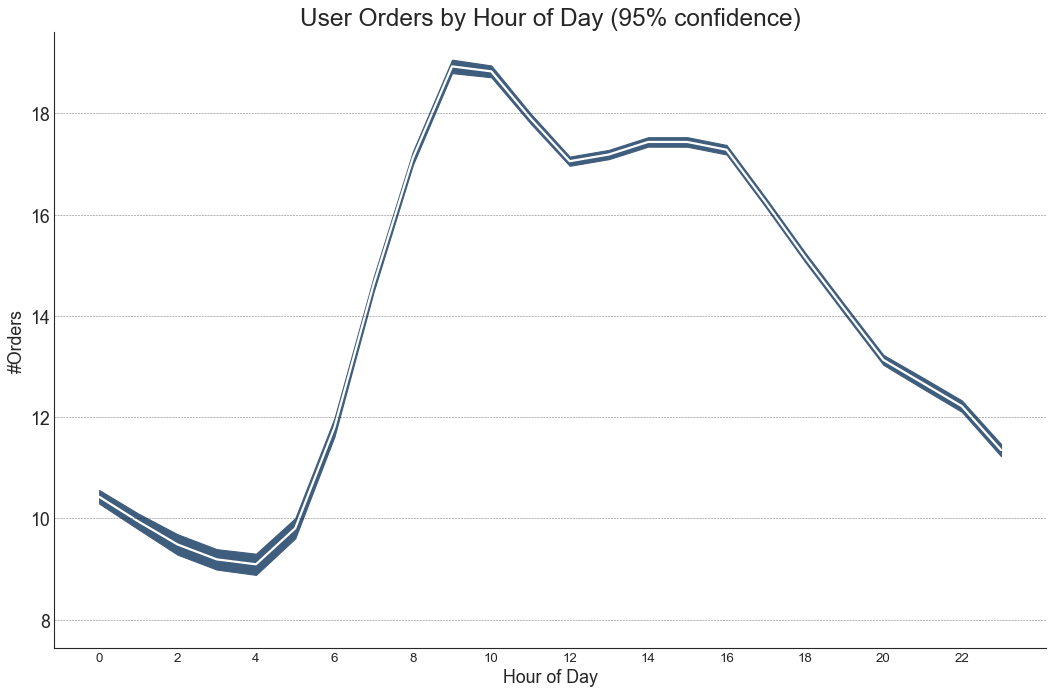

In [42]:
from scipy.stats import sem

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/user_orders_hourofday.csv")
df_mean = df.groupby('order_hour_of_day').quantity.mean()
#stanard error
df_se = df.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96)
# plot
plt.figure(figsize=(16,10),dpi=80)
plt.ylabel('#Orders',fontsize=16)
x=df_mean.index
plt.plot(x,df_mean,color='white',lw=2)
plt.fill_between(x,df_mean-df_se,df_mean+df_se,color="#3F5D7D")
# Decorations

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("User Orders by Hour of Day (95% confidence)", fontsize=22)
plt.xlabel("Hour of Day")

s, e = plt.gca().get_xlim()
plt.xlim(s, e)

# Draw Horizontal Tick lines  
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

In [44]:
from dateutil.parser import parse
from scipy.stats import sem

# Import Data
df_raw = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/orders_45d.csv', 
                     parse_dates=['purchase_time', 'purchase_date'])



In [45]:
df_raw

,purchase_time,purchase_date,quantity
0,2017-05-16 13:10:30,2017-05-16,5
1,2017-05-16 19:41:10,2017-05-16,3
2,2017-05-19 18:53:40,2017-05-19,2
3,2017-05-18 13:55:47,2017-05-18,1
4,2017-05-14 20:28:25,2017-05-14,3
...,...,...,...
5475,2017-05-17 15:48:44,2017-05-17,3
5476,2017-05-04 21:05:28,2017-05-04,2
5477,2017-05-20 11:43:49,2017-05-20,10
5478,2017-06-07 11:02:37,2017-06-07,4


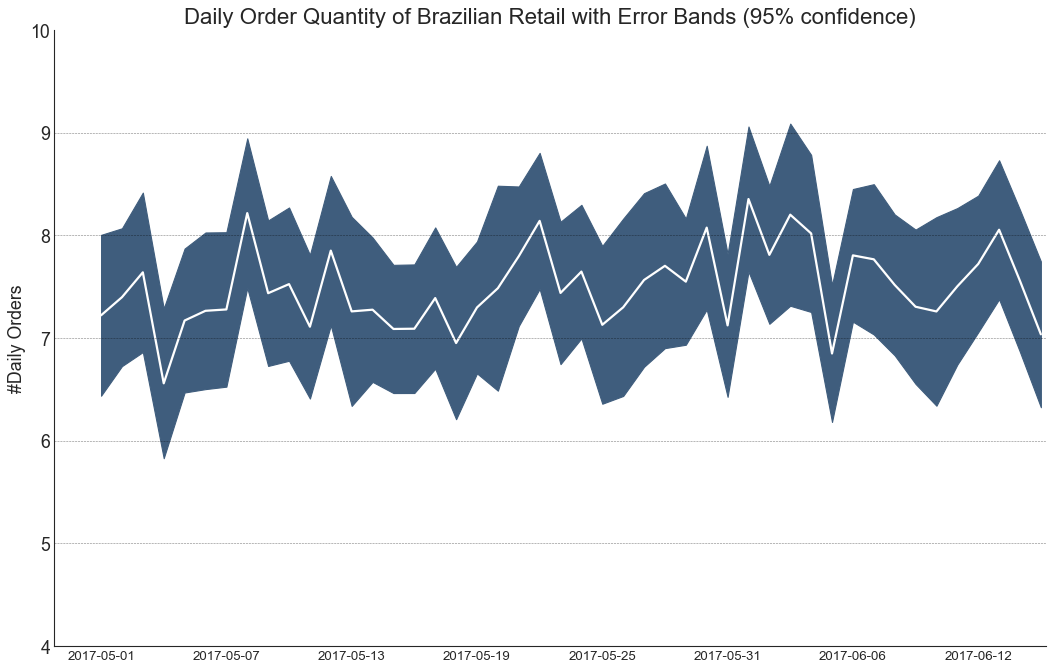

In [50]:
#Prepare Data
df_mean = df_raw.groupby('purchase_date').quantity.mean()
#stanard error
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)
#Plot
plt.figure(figsize=(16,10),dpi=80)
plt.ylabel('#Daily Orders',fontsize=16)
x=[d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x,df_mean,color='white',lw=2)
plt.fill_between(x,df_mean-df_se,df_mean+df_se,color="#3F5D7D")

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]] , fontsize=12)
plt.title("Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)", fontsize=20)


# Axis limits
s, e = plt.gca().get_xlim()
plt.xlim(s, e-2)
plt.ylim(4, 10)

# Draw Horizontal Tick lines  
for y in range(5, 10, 1):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

## 43. Stacked Area Chart

In [51]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')

# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      


In [53]:
df.head()

,yearmon,Sydney,NSW,Melbourne,VIC,BrisbaneGC,QLD,Capitals,Other
0,Jan 1998,7320,21782,4865,14054,9055,8016,9178,10232
1,Apr 1998,6117,16881,4100,8237,5616,8461,6362,9540
2,Jul 1998,6282,13495,4418,6731,8298,13175,7965,12385
3,Oct 1998,6368,15963,5157,7675,6674,9092,6864,13098
4,Jan 1999,6602,22718,5550,13581,9168,10224,8908,10140


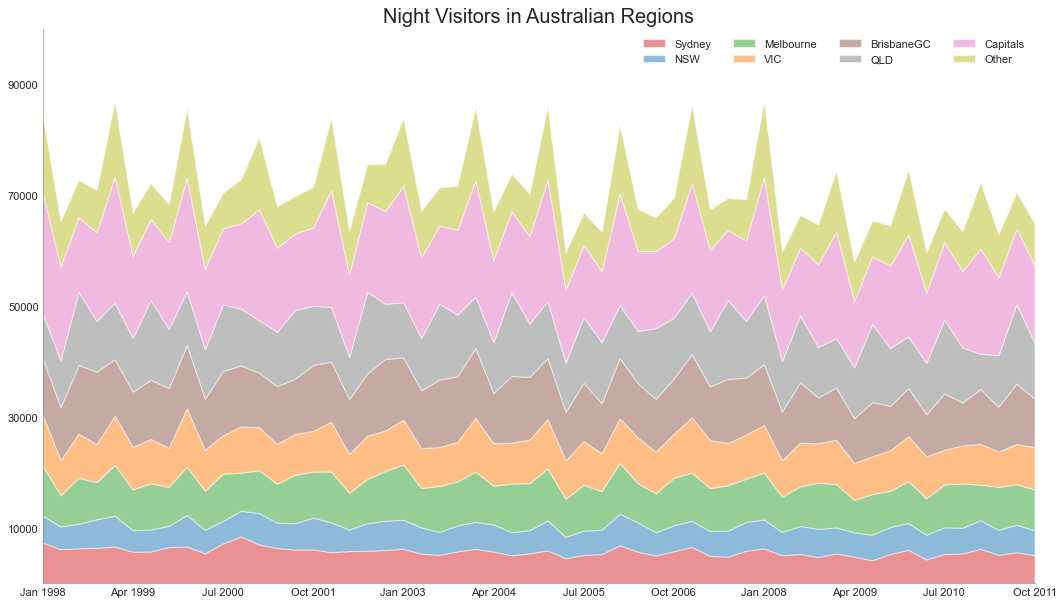

In [59]:
#Draw plot and annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()
#prepre data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

#plot for each column
ax=plt.gca()
ax.stackplot(x,y,labels=labs,colors=mycolors,alpha=0.5)
# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

## 44. Area Chart Unstacked

In [60]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


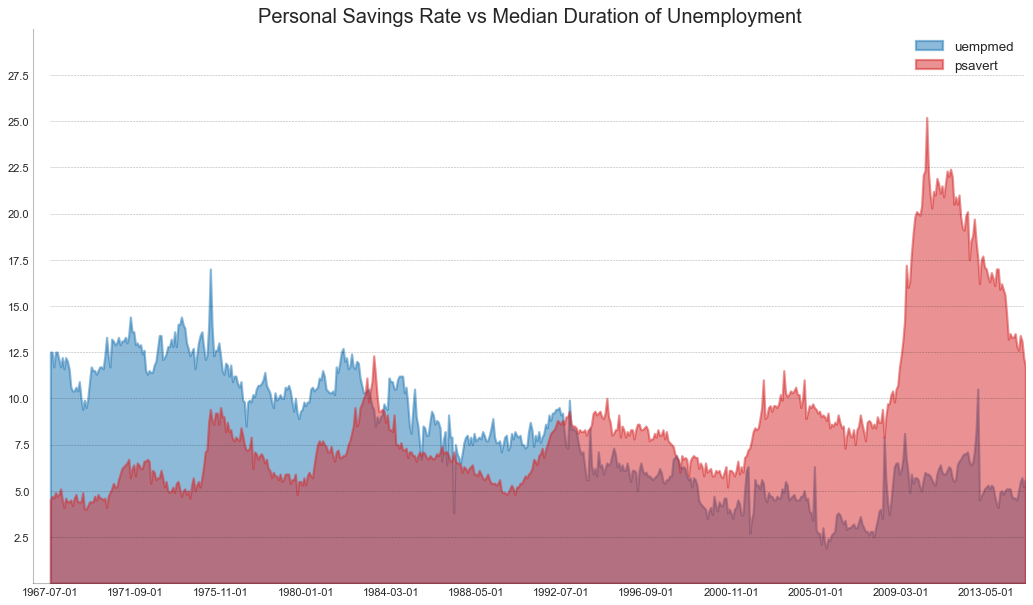

In [64]:
#preapre data
x=df['date'].values.tolist()
y1=df['psavert'].values.tolist()
y2=df['uempmed'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']
#draw plot
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x,y1=y1,y2=0,label=columns[1],alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x,y1=y2,y2=0,label=columns[0],alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# Draw Tick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()
                      

## 45. Calendar Heat Map


/Users/freyali/anaconda3/envs/2023summer/lib/python3.8/site-packages/calmap/__init__.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _pandas_18 = StrictVersion(pd.__version__) >= StrictVersion("0.18")
/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_37496/640585552.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
/Users/freyali/anaconda3/envs/2023summer/lib/python3.8/site-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]


<Figure size 1280x800 with 0 Axes>

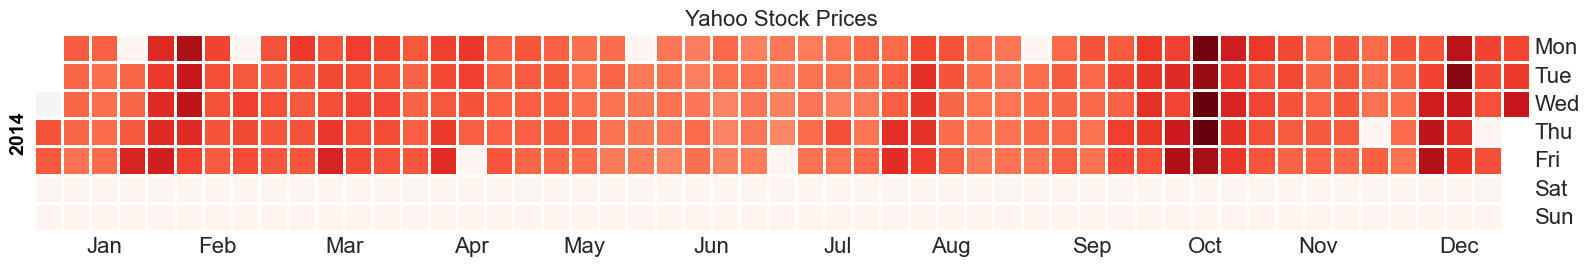

In [2]:
import matplotlib as mpl
import calmap

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
plt.show()


## 46. Seasonal Plot

In [3]:
from dateutil.parser import parse 

In [4]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [5]:
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [6]:
#Prepare data
df['year']=[parse(d).year for d in df.date]

df['month']=[parse(d).strftime('%b') for d in df.date]
years=df['year'].unique()

In [8]:
#draw plot
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(16,10), dpi= 80)


<Figure size 1280x800 with 0 Axes>

<Figure size 1280x800 with 0 Axes>

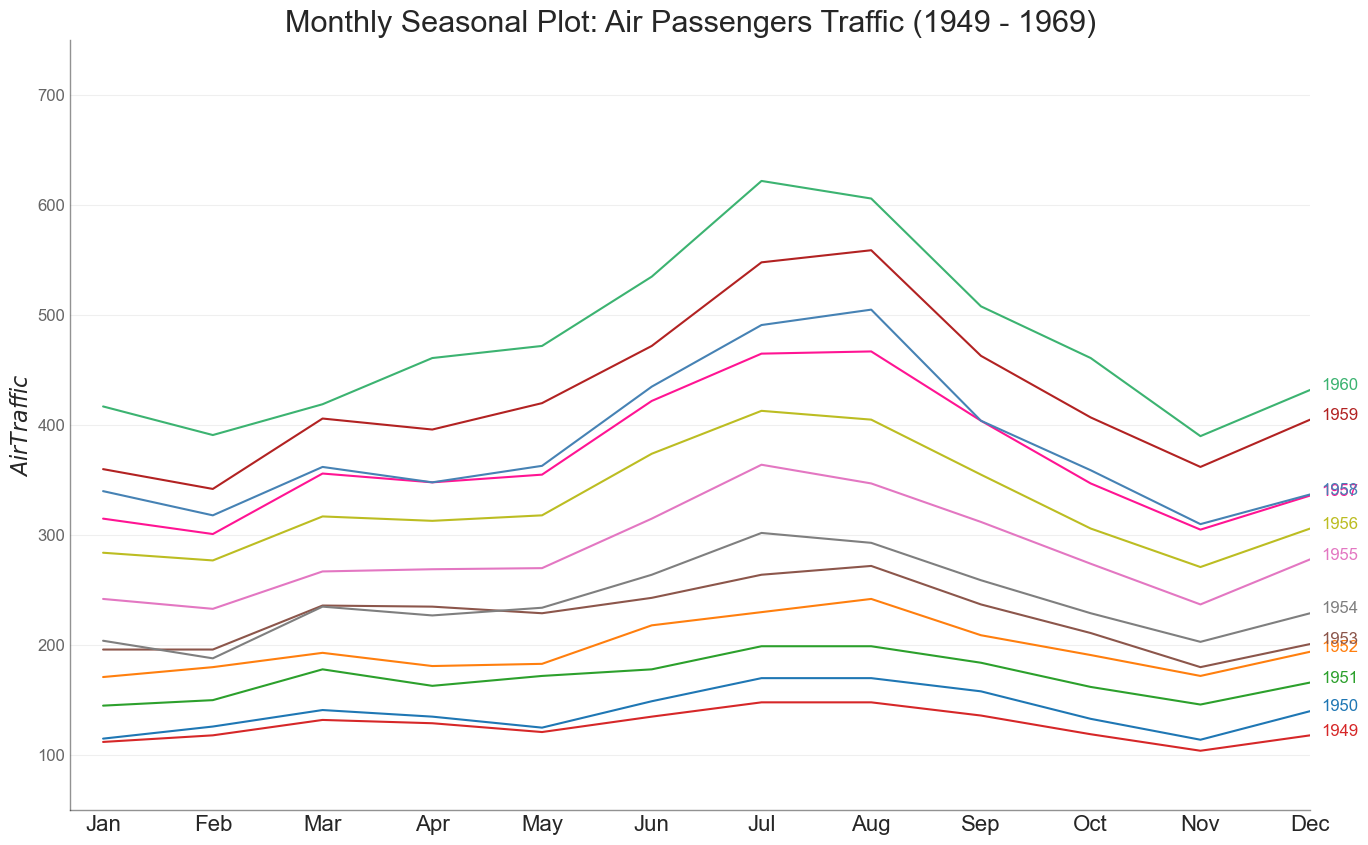

In [9]:
for i, y in enumerate(years):
    plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])
    
    
# Decoration
plt.ylim(50,750)
plt.xlim(-0.3, 11)
plt.ylabel('$Air Traffic$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
# plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()    
